# Visualization

In [1]:
# ---------------------------------------------
# Library
# ---------------------------------------------
import sqlite3, pandas, dask.dataframe as dd, datetime
import matplotlib.pyplot as plt

In [2]:
# ---------------------------------------------
# Applied functions
# ---------------------------------------------
# To manipulate the dataframe more efficient, 
# using dataframe.apply instead of iterrows

def timestamp_to_min(timestamp):
    if timestamp < 60:
        return 0
    date_time = datetime.datetime.utcfromtimestamp(timestamp)
    return date_time.minute

def timestamp_to_min_f(timestamp):
    return timestamp / 60

def timestamp_to_hour(timestamp):
    date_time = datetime.datetime.utcfromtimestamp(timestamp)
    return date_time.hour

def timestamp_to_weekday(timestamp):
    date_time = datetime.datetime.utcfromtimestamp(timestamp).weekday()
    weekday_index = ['Mon', 'Tus', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun']
    return weekday_index[date_time]

def timestamp_to_year(timestamp):
    if timestamp < 31536000:
        return 0
    date_time = datetime.datetime.utcfromtimestamp(timestamp)
    return date_time.year

def timestamp_to_year_f(timestamp):
    return timestamp / 31536000

def response_time(CreationDate_to_datetime, FirstAnsTime):
    res_time = FirstAnsTime - CreationDate_to_datetime
    if res_time <= 0:
        # Some answer were created with negative or zero reaponse time
        return 10000
    return res_time

In [3]:
# Load data form DB
print("Load Data ... ", end = '')
Answer = pandas.read_sql('Answer', "sqlite:///data/QAT_final.db", index_col='index')
Question = pandas.read_sql('Question', "sqlite:///data/QAT_final.db", index_col='index')
print("done!")

Load Data ... done!


Text(0.5, 1.0, 'Number of questions collected by time')

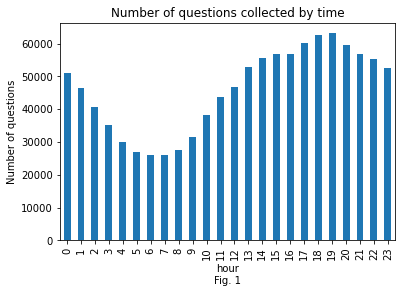

In [4]:
# ---------------------------------------------
# Fig. 1 Number of questions collected by time (hour)
# ---------------------------------------------

## Create a subset
df = Question[['Id', 'CreationDate_to_datetime']]

## Manipulate values
### Convert timestamp to hour
df['CreationDate_to_datetime'] = df['CreationDate_to_datetime'].apply(timestamp_to_hour)

## Rename columns
df.columns = ["Id", "CreateTime_hour"]

## Count the values
hist = df[['CreateTime_hour','Id']].groupby('CreateTime_hour').count()

## Plot the bar chart
hist.plot(kind='bar',legend=None)
plt.xlabel("hour\nFig. 1")
plt.ylabel("Number of questions")
plt.title("Number of questions collected by time")

Text(0.5, 1.0, 'Number of answers collected by time')

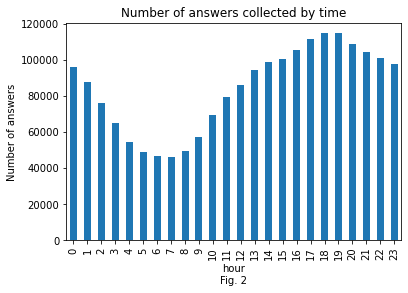

In [5]:
# ---------------------------------------------
# Fig. 2 Number of answers collected by time (hour)
# ---------------------------------------------

## Create a subset
df = Answer[['Id', 'CreationDate_to_datetime']]

## Manipulate values
### Convert timestamp to hour
df['CreationDate_to_datetime'] = df['CreationDate_to_datetime'].apply(timestamp_to_hour)

## Rename columns
df.columns = ["Id", "CreateTime_hour"]

## Count the values
hist = df[['CreateTime_hour','Id']].groupby('CreateTime_hour').count()

## Plot the bar chart
hist.plot(kind='bar',legend=None)
plt.xlabel("hour\nFig. 2")
plt.ylabel("Number of answers")
plt.title("Number of answers collected by time")

Text(0.5, 1.0, 'Number of questions collected by time')

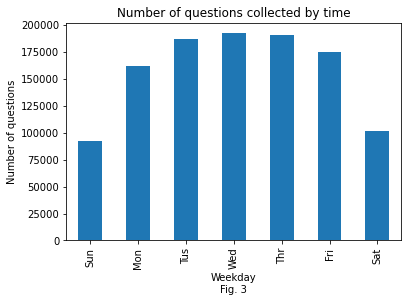

In [6]:
# ---------------------------------------------
# Fig. 3 Number of questions collected by time (weekday)
# ---------------------------------------------

## Create a subset
df = Question[['Id', 'CreationDate_to_datetime']]

## Manipulate values
### Convert timestamp to hour
df['CreationDate_to_datetime'] = df['CreationDate_to_datetime'].apply(timestamp_to_weekday)

## Rename columns
df.columns = ["Id", "CreateTime_weekday"]

## Count the values
hist = df[['CreateTime_weekday','Id']].groupby('CreateTime_weekday').count()

## Ordering the weekday
new_index = ['Sun', 'Mon', 'Tus', 'Wed', 'Thr', 'Fri', 'Sat']
hist = hist.reindex(new_index)

## Plot the bar chart
hist.plot(kind='bar',legend=None)
plt.xlabel("Weekday\nFig. 3")
plt.ylabel("Number of questions")
plt.title("Number of questions collected by time")


Text(0.5, 1.0, 'Number of answers collected by time')

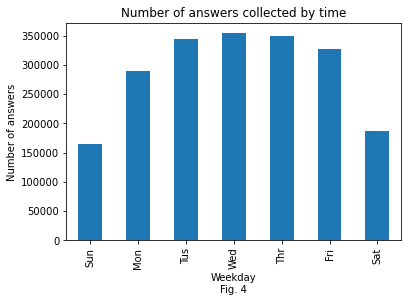

In [7]:
# ---------------------------------------------
# Fig. 4 Number of answers collected by time (weekday)
# ---------------------------------------------

## Create a subset
df = Answer[['Id', 'CreationDate_to_datetime']]

## Manipulate values
### Convert timestamp to hour
df['CreationDate_to_datetime'] = df['CreationDate_to_datetime'].apply(timestamp_to_weekday)

## Rename columns
df.columns = ["Id", "CreateTime_weekday"]

## Count the values
hist = df[['CreateTime_weekday','Id']].groupby('CreateTime_weekday').count()

## Ordering the weekday
weekday_index = ['Sun', 'Mon', 'Tus', 'Wed', 'Thr', 'Fri', 'Sat']
hist = hist.reindex(weekday_index)

## Plot the bar chart
hist.plot(kind='bar',legend=None)
plt.xlabel("Weekday\nFig. 4")
plt.ylabel("Number of answers")
plt.title("Number of answers collected by time")

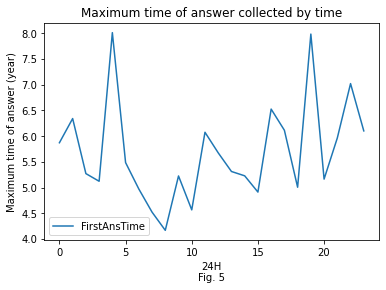

In [8]:
# ---------------------------------------------
# Fig. 5 Maximum time of first answer (year) collected by time (hour)
# ---------------------------------------------

## Create a subset
df = Question[['CreationDate_to_datetime', 'FirstAnsTime']]

## Manipulate values
### Get the response time (first answer time - create time)
df['FirstAnsTime'] = df['FirstAnsTime'] - df['CreationDate_to_datetime']
### Convert timestamp to year(float)
df['FirstAnsTime'] = df['FirstAnsTime'].apply(timestamp_to_year_f)
### Convert timestamp to hour
df['CreationDate_to_datetime'] = df['CreationDate_to_datetime'].apply(timestamp_to_hour)

## Rename columns
df.columns = ['CreateTime_hour','FirstAnsTime']

## Get the maximum value
hist = df[['CreateTime_hour','FirstAnsTime']].groupby('CreateTime_hour').max()

## Plot the chart
ax = hist.plot()
plt.xlabel("24H\nFig. 5")
plt.ylabel("Maximum time of answer (year)")
plt.title("Maximum time of answer collected by time")
plt.show()


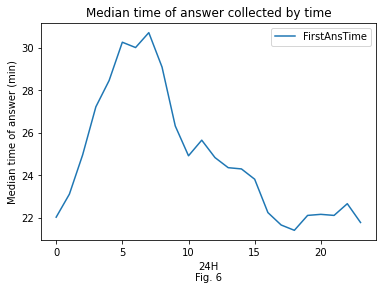

In [9]:
# ---------------------------------------------
# Fig. 6 Median time of first answer (min) collected by time (hour)
# ---------------------------------------------

## Create a subset
df = Question[['CreationDate_to_datetime', 'FirstAnsTime']]

## Manipulate values
### Get the response time (first answer time - create time)
df['FirstAnsTime'] = df['FirstAnsTime'] - df['CreationDate_to_datetime']
### Convert timestamp to minute(float)
df['FirstAnsTime'] = df['FirstAnsTime'].apply(timestamp_to_min_f)
### Convert timestamp to hour
df['CreationDate_to_datetime'] = df['CreationDate_to_datetime'].apply(timestamp_to_hour)

## Rename columns
df.columns = ['CreateTime_hour','FirstAnsTime']

## Get the median value
hist = df[['CreateTime_hour','FirstAnsTime']].groupby('CreateTime_hour').median()

## Plot the chart
ax = hist.plot()
plt.xlabel("24H\nFig. 6")
plt.ylabel("Median time of answer (min)")
plt.title("Median time of answer collected by time")
plt.show()

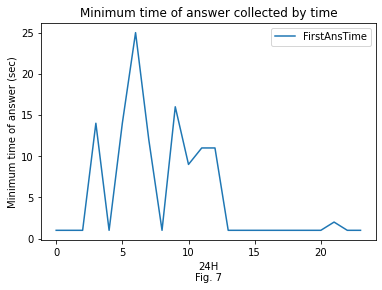

In [10]:
# ---------------------------------------------
# Fig. 7 Minimum time of first answer (sec) collected by time (hour)
# ---------------------------------------------

## Create a subset
df = Question[['CreationDate_to_datetime', 'FirstAnsTime']]

## Manipulate values
### Get the response time (first answer time - create time)
### Applying our own function to remove outlier
df['FirstAnsTime'] = df.apply(lambda x: response_time(x['CreationDate_to_datetime'], x['FirstAnsTime']), axis=1)
### Convert timestamp to hour
df['CreationDate_to_datetime'] = df['CreationDate_to_datetime'].apply(timestamp_to_hour)

## Rename columns
df.columns = ['CreateTime_hour','FirstAnsTime']

## Get the minimum value
hist = df[['CreateTime_hour','FirstAnsTime']].groupby('CreateTime_hour').min()

ax = hist.plot()
plt.xlabel("24H\nFig. 7")
plt.ylabel("Minimum time of answer (sec)")
plt.title("Minimum time of answer collected by time")
plt.show()

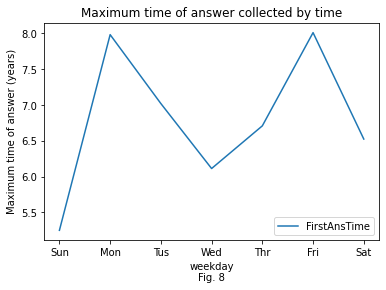

In [11]:
# ---------------------------------------------
# Fig. 8 Maximum time of first answer (year) collected by time (weekday)
# ---------------------------------------------

## Create a subset
df = Question[['CreationDate_to_datetime', 'FirstAnsTime']]

## Manipulate values
### Get the response time (first answer time - create time)
df['FirstAnsTime'] = df['FirstAnsTime'] - df['CreationDate_to_datetime']
### Convert timestamp to year(float)
df['FirstAnsTime'] = df['FirstAnsTime'].apply(timestamp_to_year_f)
### Convert timestamp to weekday
df['CreationDate_to_datetime'] = df['CreationDate_to_datetime'].apply(timestamp_to_weekday)

## Rename columns
df.columns = ['CreateTime_weekday','FirstAnsTime']

## Get the maximum value
hist = df[['CreateTime_weekday','FirstAnsTime']].groupby('CreateTime_weekday').max()

## Ordering the weekday
weekday_index = ['Sun', 'Mon', 'Tus', 'Wed', 'Thr', 'Fri', 'Sat']
hist = hist.reindex(weekday_index)

## Plot the chart
ax = hist.plot()
plt.xlabel("weekday\nFig. 8")
plt.ylabel("Maximum time of answer (years)")
plt.title("Maximum time of answer collected by time")
plt.show()

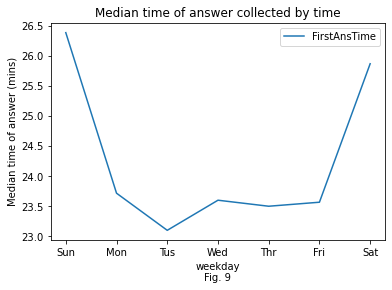

In [12]:
# ---------------------------------------------
# Fig. 9 Median time of first answer (min) collected by time (weekday)
# ---------------------------------------------

## Create a subset
df = Question[['CreationDate_to_datetime', 'FirstAnsTime']]

## Manipulate values
### Get the response time (first answer time - create time)
df['FirstAnsTime'] = df['FirstAnsTime'] - df['CreationDate_to_datetime']
### Convert timestamp to minute(float)
df['FirstAnsTime'] = df['FirstAnsTime'].apply(timestamp_to_min_f)
### Convert timestamp to weekday
df['CreationDate_to_datetime'] = df['CreationDate_to_datetime'].apply(timestamp_to_weekday)

## Rename columns
df.columns = ['CreateTime_weekday','FirstAnsTime']

## Get the median value
hist = df[['CreateTime_weekday','FirstAnsTime']].groupby('CreateTime_weekday').median()

## Ordering the weekday
weekday_index = ['Sun', 'Mon', 'Tus', 'Wed', 'Thr', 'Fri', 'Sat']
hist = hist.reindex(weekday_index)

## Plot the chart
ax = hist.plot()
plt.xlabel("weekday\nFig. 9")
plt.ylabel("Median time of answer (mins)")
plt.title("Median time of answer collected by time")
plt.show()

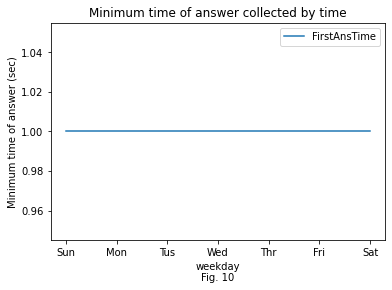

In [13]:
# ---------------------------------------------
# Fig. 10 Minimum time of first answer (sec) collected by time (weekday)
# ---------------------------------------------

## Create a subset
df = Question[['CreationDate_to_datetime', 'FirstAnsTime']]

## Manipulate values
### Get the response time (first answer time - create time)
### Applying our own function to remove outlier
df['FirstAnsTime'] = df.apply(lambda x: response_time(x['CreationDate_to_datetime'], x['FirstAnsTime']), axis=1)
### Convert timestamp to weekday
df['CreationDate_to_datetime'] = df['CreationDate_to_datetime'].apply(timestamp_to_weekday)

## Rename columns
df.columns = ['CreateTime_weekday','FirstAnsTime']

## Get the minimum value
hist = df[['CreateTime_weekday','FirstAnsTime']].groupby('CreateTime_weekday').min()

## Ordering the weekday
weekday_index = ['Sun', 'Mon', 'Tus', 'Wed', 'Thr', 'Fri', 'Sat']
hist = hist.reindex(weekday_index)

ax = hist.plot()
plt.xlabel("weekday\nFig. 10")
plt.ylabel("Minimum time of answer (sec)")
plt.title("Minimum time of answer collected by time")
plt.show()

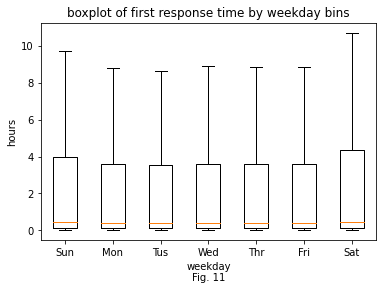

In [14]:
# ---------------------------------------------
# Fig. 11 Boxplot of first response time (hour) by weekday bins
# ---------------------------------------------

## Create a subset
df = Question[['CreationDate_to_datetime', 'FirstAnsTime']]

## Manipulate values
### Get the response time (first answer time - create time)
### Applying our own function to remove outlier
df['FirstAnsTime'] = df.apply(lambda x: response_time(x['CreationDate_to_datetime'], x['FirstAnsTime']), axis=1)
### Convert timestamp to weekday
df['CreationDate_to_datetime'] = df['CreationDate_to_datetime'].apply(timestamp_to_weekday)

## Rename columns
df.columns = ['CreateTime_weekday','FirstAnsTime']

## Count data and put into a list
weekday_index = ['Sun', 'Mon', 'Tus', 'Wed', 'Thr', 'Fri', 'Sat']
data_in_week = []
one_hour = 60*60.0
for weekday in weekday_index:
    data_in_week.append(df[df['CreateTime_weekday'] == weekday]['FirstAnsTime']/one_hour)

## plot the boxplot
bp = plt.boxplot(data_in_week,showfliers=False)
plt.xticks(list(range(1,8)), weekday_index)
plt.ylabel('hours')
plt.xlabel('weekday\nFig. 11')
plt.title('boxplot of first response time by weekday bins')
plt.show()


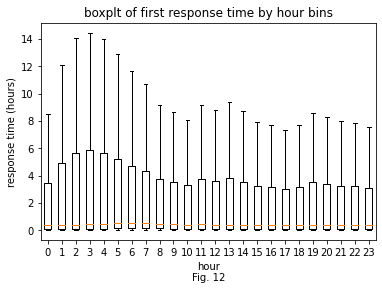

In [15]:
# ---------------------------------------------
# Fig. 12 Boxplot of first response time (hour) by hour bins
# ---------------------------------------------

## Create a subset
df = Question[['CreationDate_to_datetime', 'FirstAnsTime']]

## Manipulate values
### Get the response time (first answer time - create time)
### Applying our own function to remove outlier
df['FirstAnsTime'] = df.apply(lambda x: response_time(x['CreationDate_to_datetime'], x['FirstAnsTime']), axis=1)
### Convert timestamp to hour
df['CreationDate_to_datetime'] = df['CreationDate_to_datetime'].apply(timestamp_to_hour)

## Rename columns
df.columns = ['CreateTime_hour','FirstAnsTime']

## Count data and put into a list
hour_index = list(range(0,24))
data_in_hour = []
one_hour = 60*60.0
for hour in hour_index:
    data_in_hour.append(df[df['CreateTime_hour'] == hour]['FirstAnsTime']/one_hour)

## plot the boxplot
bp = plt.boxplot(data_in_hour,showfliers=False)
plt.xticks(list(range(1,25)), hour_index)
plt.ylabel('response time (hours)')
plt.xlabel('hour\nFig. 12')
plt.title('boxplt of first response time by hour bins')
plt.show()